In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gp import *
from gp_ensemble import GPEnsemble
from data_loader import data_loader
import time
import casadi as cs

In [2]:
filename = 'trajectory.pkl'
compute_reduction = 100
n_training_samples = 10

d_loader = data_loader(filename, compute_reduction, n_training_samples)               



z = d_loader.get_z(training=False)
y = d_loader.get_y(training=False)


z_train = d_loader.get_z(training=True)
y_train = d_loader.get_y(training=True)

# x velocity
z_train_x = z_train[:,7].reshape(-1,1)
z_x = z[:,7].reshape(-1,1)

y_train_x = y_train[:,0].reshape(-1,1)
y_x = y[:,0].reshape(-1,1)

# y velocity
z_train_y = z_train[:,8].reshape(-1,1)
z_y = z[:,8].reshape(-1,1)

y_train_y = y_train[:,1].reshape(-1,1)
y_y = y[:,1].reshape(-1,1)

# z velocity
z_train_z = z_train[:,9].reshape(-1,1)
z_z = z[:,9].reshape(-1,1)

y_train_z = y_train[:,2].reshape(-1,1)
y_z = y[:,2].reshape(-1,1)



gpe = GPEnsemble(3)


theta0 = [1,1,1] # Kernel variables

#RBF = KernelFunction(np.eye(theta0[0]), theta0[1])

gpr = GPR(z_train_x, y_train_x, covariance_function=KernelFunction, theta=theta0)
gpe.add_gp(gpr, 0)

gpr = GPR(z_train_y, y_train_y, covariance_function=KernelFunction, theta=theta0)
gpe.add_gp(gpr, 1)

gpr = GPR(z_train_z, y_train_z, covariance_function=KernelFunction, theta=theta0)
gpe.add_gp(gpr, 2)

gpe.fit()
y_pred = gpe.predict(z[:,7:10])

z_query = np.concatenate([np.arange(-20,20,0.5).reshape(-1,1) for i in range(3)], axis=1)
y_query = gpe.predict(z_query)


Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [6.40232692 6.95329637 0.01      ]
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [1.05537744e+01 2.10125149e+01 1.00000000e-02]
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [1.006103

In [3]:

# Casadi 
z_sample_cs = cs.SX.sym('x_sample', z_query.shape[0], 3)
f_grads = gpe.jacobian(z_sample_cs)


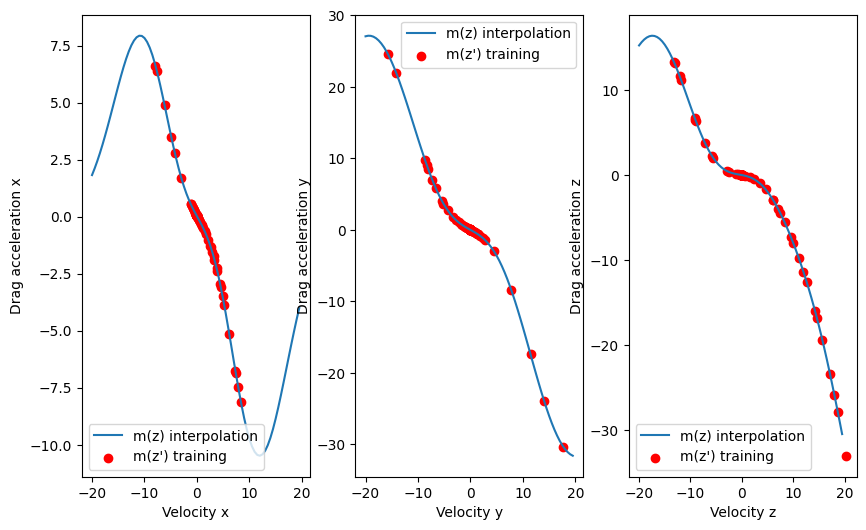

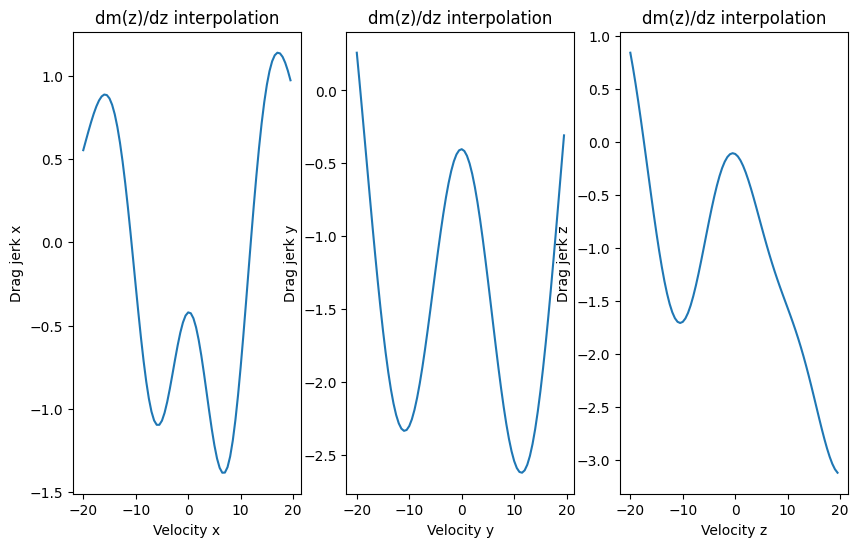

In [6]:
xyz = ['x','y','z']
plt.figure(figsize=(10, 6), dpi=100)
for col in range(y_pred.shape[1]):
    #print(np.ravel([f_grads[col](z_query[:,col])[d,d].full() for d in range(z_query.shape[0])]))
    plt.subplot(1,3,col+1)
    plt.plot(z_query[:,col], y_query[:,col])
    plt.scatter(z[:,7+col], y_pred[:,col], c='r')
    plt.xlabel(f'Velocity {xyz[col]}')
    plt.ylabel(f'Drag acceleration {xyz[col]}')
    plt.legend(('m(z) interpolation', "m(z') training"))



plt.figure(figsize=(10, 6), dpi=100)
for col in range(z_query.shape[1]):
    #print(np.ravel([f_grads[col](z_query[:,col])[d,d].full() for d in range(z_query.shape[0])]))
    plt.subplot(1,3,col+1)
    
    plt.plot(z_query[:,col], np.ravel([f_grads[col](z_query[:,col])[d,d].full() for d in range(z_query.shape[0])]))
    plt.xlabel(f'Velocity {xyz[col]}')
    plt.ylabel(f'Drag jerk {xyz[col]}')
    plt.title('dm(z)/dz interpolation')